# V-clamp channels


## Implement and compare new kaf current


### Activation

<img src='Channel_data/Kaf-Tkatch2000/fig2_activation.png'>

In [3]:
%matplotlib inline

from    neuron  import          h
import  numpy                as np
import  matplotlib.pyplot    as plt
import  matplotlib.image     as mpimg
import  json

from mpl_toolkits.axes_grid.inset_locator import inset_axes


h.load_file('stdlib.hoc')
h.load_file('import3d.hoc')
    

1.0

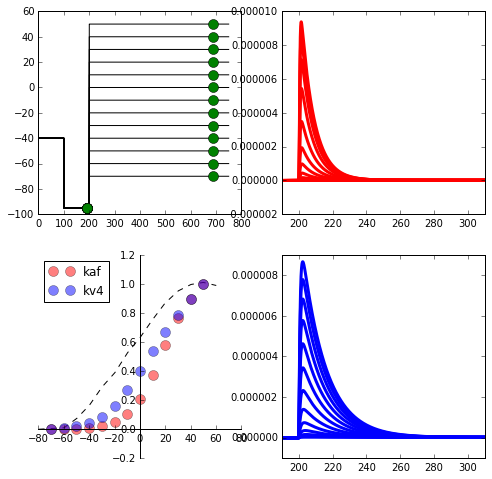

In [4]:
# create cell and general setup ----------------------------------------------------------
cell = h.Section(name='cell')


# insert and specify mechanisms 
for mech in ["kv4", "kaf"]:
    cell.insert(mech)

cell(0.5).gbar_kv4    = 1e-7
cell(0.5).gbar_kaf    = 1e-7

casc    =   h.D1_reduced_cascade2_0(0.5, sec=cell) 
pointer =   casc._ref_Target1p

h.setpointer( pointer, 'pka',  cell(0.5).kv4)
h.setpointer( pointer, 'pka',  cell(0.5).kaf)


# Protocol 1 =============================================================================
#            fig 2 in Tkatch et al., 2000

clampBase   = -40
clamp       = h.SEClamp(cell(0.5))
clamp.rs    = 0.01
clamp.dur1  = 100
clamp.amp1  = clampBase
clamp.dur2  = 100
clamp.amp2  = -95
clamp.dur3  = 500



# Create plot window  
fig,ax      = plt.subplots( 2,2, figsize=(8,8) )

# Define result structures etc
start_index = int((190)/h.dt)
end___index = int((690)/h.dt)
voltage     = np.arange(-70,51,10)
N           = len(voltage)
gradient    = [(1.0*x/(N-1), 0, 1-1.0*x/(N-1)) for x in range(N)]

channels    = ["kaf", "kv4"]
res         = {"kv4":{}, "kaf":{}}
Max         = {"kv4":[], "kaf":[]}
    
color       = ['r', 'b']

# run clamp protocol ---------------------------------------------------------------------
for v,V in enumerate(voltage):
    
    clamp.amp3  = V
    
    # define record vectors 
    
    # kaf
    res["kaf"][V] = h.Vector()
    res["kaf"][V].record(cell(0.5).kaf._ref_ik)
    
    # kv4
    res["kv4"][V] = h.Vector()
    res["kv4"][V].record(cell(0.5).kv4._ref_ik)
    
    # tm
    tm = h.Vector()
    tm.record(h._ref_t)

    vm = h.Vector()
    vm.record(cell(0.5)._ref_v)


    # finilize and run
    h.finitialize(clampBase)
    while h.t < 750:
        h.fadvance()
    
    
    # plotting ***
    
    # potential
    ax[0,0].plot(tm, vm, 'k')
    ax[0,0].plot(tm[start_index], vm[start_index], 'og', ms=10)
    ax[0,0].plot(tm[end___index], vm[end___index], 'og', ms=10)
    
    
    for i, chan in enumerate(channels):
        
        # plot current
        ax[i,1].plot(tm, res[chan][V], color=color[i], lw=3)
    
        # get peak values of current 
        extract_peak = res[chan][V].to_python()
        Max[chan].append( max( extract_peak[start_index:end___index] ) )


# plotting IV 

ax[1,0].plot(*np.loadtxt('Channel_data/Kaf-Tkatch2000/kaf_m_curve.csv', unpack=True), color='k', ls='--')

for i, chan in enumerate(channels):
    
    ax[1,0].plot(voltage, 
                 np.divide(Max[chan],max(Max[chan])), 
                 'o',
                 color=color[i], 
                 ms=10,
                 alpha=0.5,
                 label=chan
                )

    # configure range of current plot  
    ax[i,1].set_xlim([190, 310])


ax[1,0].spines['right'].set_color('none')
ax[1,0].spines['top'  ].set_color('none')
ax[1,0].xaxis.set_ticks_position('bottom')
ax[1,0].spines['bottom'].set_position(('data',0))
ax[1,0].yaxis.set_ticks_position('left')
ax[1,0].spines['left'].set_position(('data',0))

ax[1,0].legend(loc='best')

plt.show()


### Inactivation
<img src='Channel_data/Kaf-Tkatch2000/fig3_inactivation.png'>

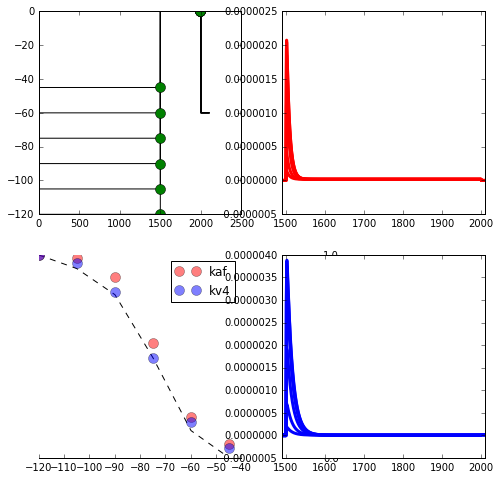

In [5]:
# Protocol 2 =============================================================================
#            fig 3 in Tkatch et al., 2000


clamp.dur1  = 1500
clamp.dur2  = 500
clamp.amp2  = 0
clamp.dur3  = 50
clamp.amp3  = -60


# Create plot window  
fig,ax      = plt.subplots( 2,2, figsize=(8,8) )

# Define result structures etc
start_index = int((1490)/h.dt)
end___index = int((1990)/h.dt)
voltage     = np.arange(-120,-44,15)

channels    = ["kaf", "kv4"]
res         = {"kv4":{}, "kaf":{}}
Max         = {"kv4":[], "kaf":[]}
    
color       = ['r', 'b']




# run clamp protocol ---------------------------------------------------------------------
for v,V in enumerate(voltage):

    
    clamp.amp1  = V
    
    # define record vectors 
    
    # kaf
    res["kaf"][V] = h.Vector()
    res["kaf"][V].record(cell(0.5).kaf._ref_ik)
    
    # kv4
    res["kv4"][V] = h.Vector()
    res["kv4"][V].record(cell(0.5).kv4._ref_ik)

    tm = h.Vector()
    tm.record(h._ref_t)

    vm = h.Vector()
    vm.record(cell(0.5)._ref_v)


    # finilize and run
    h.finitialize(V)
    while h.t < 2100:
        h.fadvance()
    
    
    # plotting ***
    
    # potential
    ax[0,0].plot(tm, vm, 'k')
    ax[0,0].plot(tm[start_index], vm[start_index], 'og', ms=10)
    ax[0,0].plot(tm[end___index], vm[end___index], 'og', ms=10)
    
    for i, chan in enumerate(channels):
        
        # plot current
        ax[i,1].plot(tm, res[chan][V], color=color[i], lw=3)
    
        # get peak values of current 
        extract_peak = res[chan][V].to_python()
        Max[chan].append( max( extract_peak[start_index:end___index] ) )

        


ax[1,0].plot(*np.loadtxt('Channel_data/Kaf-Tkatch2000/kaf_h_curve.csv', unpack=True), color='k', ls='--')

for i, chan in enumerate(channels):
    
    ax[1,0].plot(voltage, 
                 np.divide(Max[chan],max(Max[chan])), 
                 'o',
                 color=color[i], 
                 ms=10,
                 alpha=0.5,
                 label=chan
                )

    # configure range of current plot  
    ax[i,1].set_xlim(1490, 2010)


ax[1,0].spines['right'].set_color('none')
ax[1,0].spines['top'  ].set_color('none')
ax[1,0].xaxis.set_ticks_position('bottom')
ax[1,0].spines['bottom'].set_position(('data',0))
ax[1,0].yaxis.set_ticks_position('left')
ax[1,0].spines['left'].set_position(('data',0))

ax[1,0].legend(loc='best')

plt.show()


### Recovery from inactivation


<img src='Channel_data/Kaf-Tkatch2000/fig4_recovery.png'>

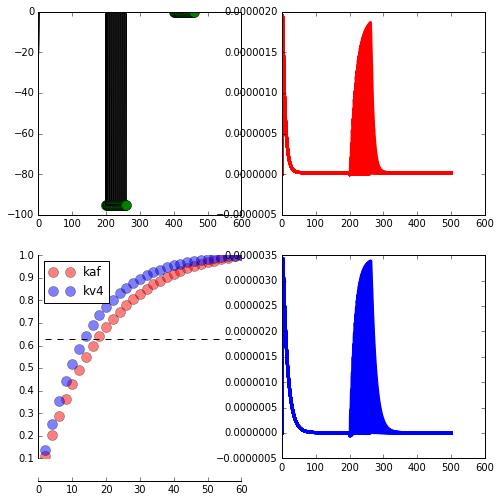

In [6]:
# Protocol 3 =============================================================================
#            fig 4 in Tkatch et al., 2000

clamp.dur1  =  200
clamp.amp1  =  0

clamp.amp2  = -95
clamp.dur3  =  200
clamp.amp3  =  0


# Create plot window  
fig,ax      = plt.subplots( 2,2, figsize=(8,8) )


# Define result structures etc
time        = np.arange(2,61,2)
N           = len(time)
gradient    = [(1.0*x/(N-1), 0, 1-1.0*x/(N-1)) for x in range(N)]
res         = {}
Max         = []  

channels    = ["kaf", "kv4"]
res         = {"kv4":{}, "kaf":{}}
Max         = {"kv4":[], "kaf":[]}
    
color       = ['r', 'b']

# run clamp protocol ---------------------------------------------------------------------
for v,V in enumerate(time):
    
    clamp.dur2  = V
    
    # define record vectors 
    
    # kaf
    res["kaf"][V] = h.Vector()
    res["kaf"][V].record(cell(0.5).kaf._ref_ik)
    
    # kv4
    res["kv4"][V] = h.Vector()
    res["kv4"][V].record(cell(0.5).kv4._ref_ik)

    tm = h.Vector()
    tm.record(h._ref_t)

    vm = h.Vector()
    vm.record(cell(0.5)._ref_v)


    # finilize and run
    h.finitialize(-95)
    while h.t < 500:
        h.fadvance()
    
    # extract plot index
    start_index = next(x[0] for x in enumerate(tm) if x[1] > 200+V-1) 
    end___index = next(x[0] for x in enumerate(tm) if x[1] > 200+V+200-1)
    
    
    # plotting ***
    
    # potential
    ax[0,0].plot(tm, vm, 'k')
    ax[0,0].plot(tm[start_index], vm[start_index], 'og', ms=10)
    ax[0,0].plot(tm[end___index], vm[end___index], 'og', ms=10)
    
    for i, chan in enumerate(channels):
        
        # plot current
        ax[i,1].plot(tm, res[chan][V], color=color[i], lw=3)
    
        # get peak values of current 
        extract_peak = res[chan][V].to_python()
        Max[chan].append( max( extract_peak[start_index:end___index] ) )

        

for i, chan in enumerate(channels):
    
    ax[1,0].plot(time, 
                 np.divide(Max[chan],max(Max[chan])), 
                 'o',
                 color=color[i], 
                 ms=10,
                 alpha=0.5,
                 label=chan
                )


ax[1,0].plot([time[0],time[-1]],[0.63, 0.63], '--k')

ax[1,0].spines['right'].set_color('none')
ax[1,0].spines['top'  ].set_color('none')
ax[1,0].xaxis.set_ticks_position('bottom')
ax[1,0].spines['bottom'].set_position(('data',0))
ax[1,0].yaxis.set_ticks_position('left')
ax[1,0].spines['left'].set_position(('data',0))

ax[1,0].legend(loc='best')

plt.show()


# Comparing sodium channels
The kinetics of the sodium channel were updated in the tuning of the model used in Lindroos et al., (2018).
Could this cause the spiking?

<img src="Channel_data/Naf/naf_comparison.png", width=800>